In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [83]:
df = pd.read_csv('//Users/visheshpanghal/Downloads/Data_Science/python/titanic/train.csv',usecols=['Age','Fare','Survived'])

In [84]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [82]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [79]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [81]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [36]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
print(X)

      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=55)

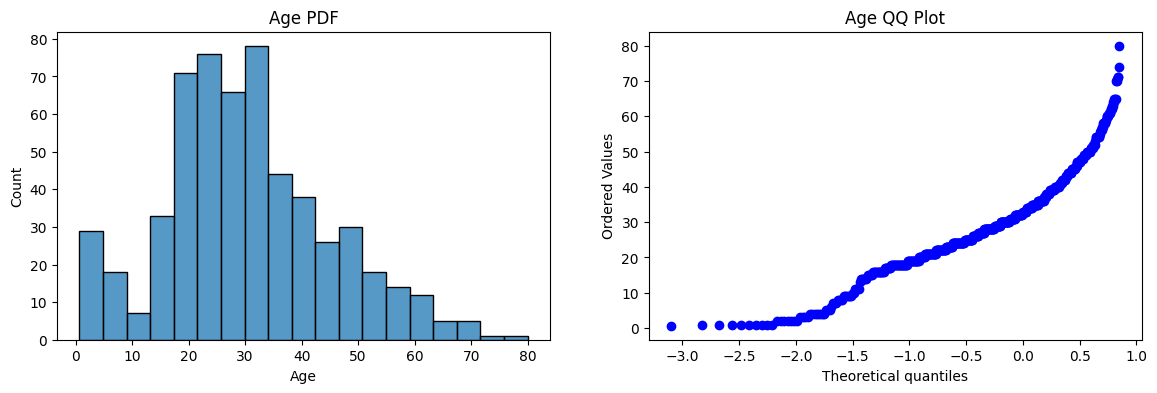

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')


plt.show()

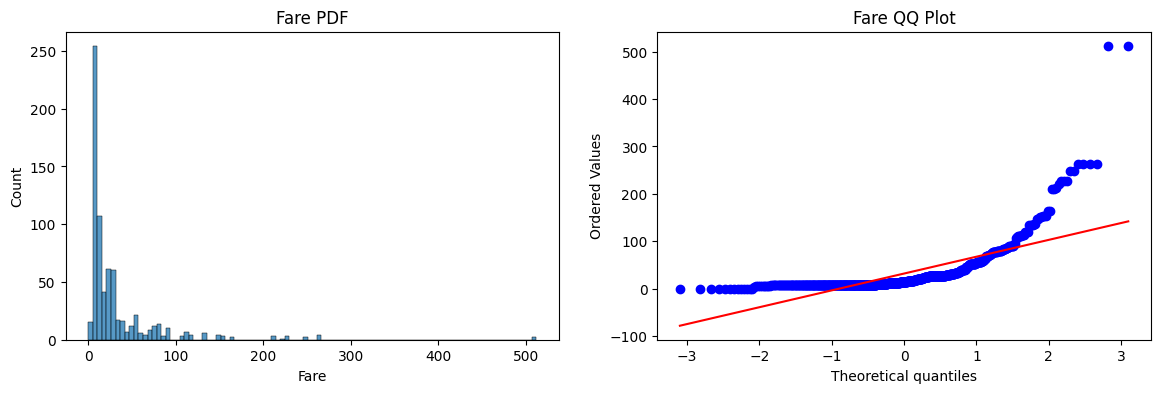

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)

stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [89]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_99406/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [91]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [106]:
X_train['Age'].fillna(X_train['Age'].mean(),inplace=True)
X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_99406/2177546007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].mean(),inplace=True)
/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_99406/2177546007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

### Before Transformation Accuracy:-

In [115]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_predict = clf.predict(X_test)
y_predict1 = clf2.predict(X_test)

print("Accuracy LR",(accuracy_score(y_test,y_predict)*100))
print("Accuracy DT",(accuracy_score(y_test,y_predict1)*100))

Accuracy LR 62.01117318435754
Accuracy DT 60.33519553072626


In [116]:
trf = FunctionTransformer(func=np.log1p)

In [120]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train

### After Transformation Accuracy:-